In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def fleiss_kappa(fleiss_matrix):
    N = fleiss_matrix.shape[0]
    k = fleiss_matrix.shape[1]
    n = np.sum(fleiss_matrix[0])

    print("N", N, "k", k, "n", n)
    
    p_is = np.empty((k))
    for i in range(k):
        p_is[i] = 1/(N*n)*np.sum(fleiss_matrix, axis = 0)[i]
    #print(p_is)
        
    P_is = np.empty((N))
    first_part = 1/(n*(n-1))
    for i in range(N):
        second_part = 0
        for j in range(k):
            second_part += fleiss_matrix[i][j]*fleiss_matrix[i][j]
        second_part -= n
        P_is[i] = first_part * second_part
    #print(P_is)
        
    P_dash = np.mean(P_is)
    #print(P_dash)
    
    P_dash_e = 0
    for i in range(k):
        P_dash_e += p_is[i]*p_is[i]
    #print(P_dash_e)

    kappa = (P_dash - P_dash_e)/(1 - P_dash_e)
    return kappa

In [3]:
data_df = pd.read_csv("../Mobile UI Fix Application Evaluation.csv").transpose()
print(len(data_df))
data_df.head(10)

35


,0,1,2
Zeitstempel,2024/08/02 6:20:51 PM OESZ,2024/08/07 11:39:32 PM OESZ,2024/08/08 11:52:47 AM OESZ
What is your age?,25,24,25
"What is your field of work or study? (e.g. Engineering, Computer Science, etc.)",Computer Science,Business Informatics,Computer Science
How much experience do you have with user interface design?,Some experience,A lot of experience,Little experience
"How much experience do you have with Material Design 3? (If you don't know what this is referring to, just select 'No Experience')",Some experience,A lot of experience,Little experience
Are the suggested changes implemented correctly?,No,Yes,No
Are the suggested changes implemented correctly?.1,Yes,No,No
Are the suggested changes implemented correctly?.2,Yes,Yes,No
Are the suggested changes implemented correctly?.3,Yes,Yes,Yes
Are the suggested changes implemented correctly?.4,Yes,Yes,No


In [4]:
sample = pd.read_csv("../User Study Sample uploaded.csv")
sample["method"] = sample["image_loc"]
sample = sample[["title", "method", "image_loc"]]
sample.head(30)

,title,method,image_loc
0,Violations:\r\n1. The color of the divider in ...,../User Study Sample/one_step/0_divider/0_divi...,../User Study Sample/one_step/0_divider/0_divi...
1,Violations:\r\n1. The FABs are not placed in t...,../User Study Sample/one_step/0_fab/0_fab_fab_...,../User Study Sample/one_step/0_fab/0_fab_fab_...
2,Violations:\r\nThe slider's handles are too sm...,../User Study Sample/one_step/1_slider/1_slide...,../User Study Sample/one_step/1_slider/1_slide...
3,Violations:\r\n1. Inconsistent Icon Button Emp...,../User Study Sample/one_step/1_bottom_sheet/1...,../User Study Sample/one_step/1_bottom_sheet/1...
4,Violations:\r\n1. Carousel items too large: Th...,../User Study Sample/one_step/0_divider/0_divi...,../User Study Sample/one_step/0_divider/0_divi...
5,Violations:\r\nThe current navigation bar uses...,../User Study Sample/one_step/0_carousel/0_car...,../User Study Sample/one_step/0_carousel/0_car...
6,Violations:\r\nThe switch is being used for an...,../User Study Sample/one_step/0_checkbox/0_che...,../User Study Sample/one_step/0_checkbox/0_che...
7,"Violations:\r\n1. The divider between ""Languag...",../User Study Sample/one_step/0_switch/0_switc...,../User Study Sample/one_step/0_switch/0_switc...
8,Violations:\r\n1. Placement issue: The FAB is ...,../User Study Sample/one_step/0_bottom_app_bar...,../User Study Sample/one_step/0_bottom_app_bar...
9,Violations:\r\nThe segmented button 'Segment-s...,../User Study Sample/one_step/1_badge/1_badge_...,../User Study Sample/one_step/1_badge/1_badge_...


In [5]:
for i in range(3):
    sample["anno_" + str(i)] = ""
sample["anno_majority"] = 0
for index, row in sample.iterrows():
    if "one_step" in row["method"]:
        sample.at[index, "method"] = "one_step"
    else:
        sample.at[index, "method"] = "two_step"
    annos = []
    for i in range(3):
        if data_df.iloc[index + 5][i] == "Yes":
            sample.at[index, "anno_" + str(i)] = 1
            annos.append(1)
        else:
            sample.at[index, "anno_" + str(i)] = 0
            annos.append(0)
    values, counts = np.unique(np.array(annos), return_counts=True)
    sample.at[index, "anno_majority"] = values[np.argmax(counts)]
sample.head(15)

,title,method,image_loc,anno_0,anno_1,anno_2,anno_majority
0,Violations:\r\n1. The color of the divider in ...,one_step,../User Study Sample/one_step/0_divider/0_divi...,0,1,0,0
1,Violations:\r\n1. The FABs are not placed in t...,one_step,../User Study Sample/one_step/0_fab/0_fab_fab_...,1,0,0,0
2,Violations:\r\nThe slider's handles are too sm...,one_step,../User Study Sample/one_step/1_slider/1_slide...,1,1,0,1
3,Violations:\r\n1. Inconsistent Icon Button Emp...,one_step,../User Study Sample/one_step/1_bottom_sheet/1...,1,1,1,1
4,Violations:\r\n1. Carousel items too large: Th...,one_step,../User Study Sample/one_step/0_divider/0_divi...,1,1,0,1
5,Violations:\r\nThe current navigation bar uses...,one_step,../User Study Sample/one_step/0_carousel/0_car...,1,0,0,0
6,Violations:\r\nThe switch is being used for an...,one_step,../User Study Sample/one_step/0_checkbox/0_che...,1,1,0,1
7,"Violations:\r\n1. The divider between ""Languag...",one_step,../User Study Sample/one_step/0_switch/0_switc...,0,0,0,0
8,Violations:\r\n1. Placement issue: The FAB is ...,one_step,../User Study Sample/one_step/0_bottom_app_bar...,1,0,0,0
9,Violations:\r\nThe segmented button 'Segment-s...,one_step,../User Study Sample/one_step/1_badge/1_badge_...,0,1,0,0


In [6]:
sample.to_csv("../User Study Sample annotated.csv", index=False)

In [7]:
one_step_sample = sample.head(15)
two_step_sample = sample.tail(15)

In [8]:
one_step_sample.head(15)

,title,method,image_loc,anno_0,anno_1,anno_2,anno_majority
0,Violations:\r\n1. The color of the divider in ...,one_step,../User Study Sample/one_step/0_divider/0_divi...,0,1,0,0
1,Violations:\r\n1. The FABs are not placed in t...,one_step,../User Study Sample/one_step/0_fab/0_fab_fab_...,1,0,0,0
2,Violations:\r\nThe slider's handles are too sm...,one_step,../User Study Sample/one_step/1_slider/1_slide...,1,1,0,1
3,Violations:\r\n1. Inconsistent Icon Button Emp...,one_step,../User Study Sample/one_step/1_bottom_sheet/1...,1,1,1,1
4,Violations:\r\n1. Carousel items too large: Th...,one_step,../User Study Sample/one_step/0_divider/0_divi...,1,1,0,1
5,Violations:\r\nThe current navigation bar uses...,one_step,../User Study Sample/one_step/0_carousel/0_car...,1,0,0,0
6,Violations:\r\nThe switch is being used for an...,one_step,../User Study Sample/one_step/0_checkbox/0_che...,1,1,0,1
7,"Violations:\r\n1. The divider between ""Languag...",one_step,../User Study Sample/one_step/0_switch/0_switc...,0,0,0,0
8,Violations:\r\n1. Placement issue: The FAB is ...,one_step,../User Study Sample/one_step/0_bottom_app_bar...,1,0,0,0
9,Violations:\r\nThe segmented button 'Segment-s...,one_step,../User Study Sample/one_step/1_badge/1_badge_...,0,1,0,0


In [9]:
fleiss_matrix = np.zeros((15, 2))
ones_os = 0

ones_0_os = 0
ones_1_os = 0
ones_2_os = 0

counter = 0
for index, row in one_step_sample.iterrows():
    annos = []
    for i in range(3):
        fleiss_matrix[counter][row["anno_"+str(i)]] += 1
    ones_os += row["anno_majority"]
    
    ones_0_os += row["anno_0"]
    ones_1_os += row["anno_1"]
    ones_2_os += row["anno_2"]
    
    counter += 1
one_step_sample.head(15)

,title,method,image_loc,anno_0,anno_1,anno_2,anno_majority
0,Violations:\r\n1. The color of the divider in ...,one_step,../User Study Sample/one_step/0_divider/0_divi...,0,1,0,0
1,Violations:\r\n1. The FABs are not placed in t...,one_step,../User Study Sample/one_step/0_fab/0_fab_fab_...,1,0,0,0
2,Violations:\r\nThe slider's handles are too sm...,one_step,../User Study Sample/one_step/1_slider/1_slide...,1,1,0,1
3,Violations:\r\n1. Inconsistent Icon Button Emp...,one_step,../User Study Sample/one_step/1_bottom_sheet/1...,1,1,1,1
4,Violations:\r\n1. Carousel items too large: Th...,one_step,../User Study Sample/one_step/0_divider/0_divi...,1,1,0,1
5,Violations:\r\nThe current navigation bar uses...,one_step,../User Study Sample/one_step/0_carousel/0_car...,1,0,0,0
6,Violations:\r\nThe switch is being used for an...,one_step,../User Study Sample/one_step/0_checkbox/0_che...,1,1,0,1
7,"Violations:\r\n1. The divider between ""Languag...",one_step,../User Study Sample/one_step/0_switch/0_switc...,0,0,0,0
8,Violations:\r\n1. Placement issue: The FAB is ...,one_step,../User Study Sample/one_step/0_bottom_app_bar...,1,0,0,0
9,Violations:\r\nThe segmented button 'Segment-s...,one_step,../User Study Sample/one_step/1_badge/1_badge_...,0,1,0,0


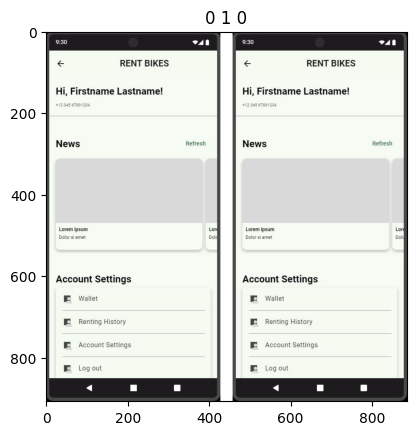

Violations:
1. The color of the divider in the 'Hi, Firstname Lastname!' section (#000000FF, Black) is too bold and visually disruptive. Material Design Guidelines suggest that dividers should be visible but not bold.

Changes:
1. Change the color of the divider in the 'Hi, Firstname Lastname!' section to a more neutral and less bold color, such as #C1C9BEFF (light grey), to make it less disruptive while still maintaining visibility.


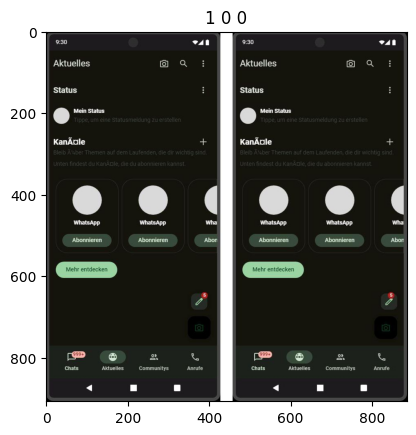

Violations:
1. The FABs are not placed in the bottom right corner of the screen. Instead, they are scattered in different positions. According to Material Design guidelines, FABs should be placed in the bottom right corner to be easily accessible using thumbs. 2. The FABs are overlapping with other elements, such as the badge and the bottom app bar. FABs should be placed above other components without overlapping them.

Changes:
1. Relocate the FABs to the bottom right corner of the screen, ensuring they do not overlap with each other or other elements. 2. Ensure the FABs are placed above the bottom app bar without overlapping it.


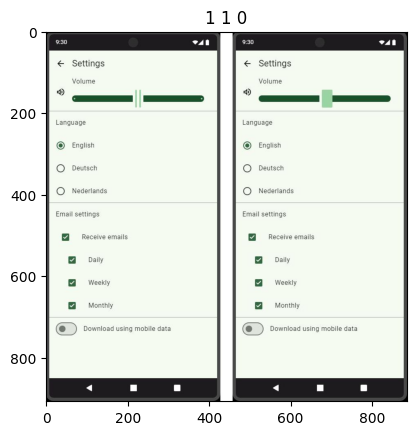

Violations:
The slider's handles are too small, which makes them difficult to interact with. Additionally, the slider's inactive track dots are unnecessary and might clutter the UI.

Changes:
Increased the width of the handles for better interaction and removed the inactive track dots.


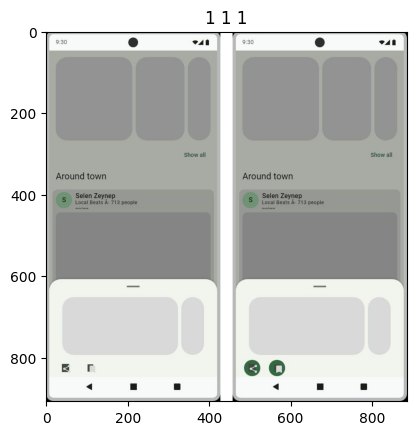

Violations:
1. Inconsistent Icon Button Emphasis: The icon buttons for 'Share' and 'Bookmark' use the 'standard' configuration, which has the lowest emphasis according to Material Design 3 guidelines. These actions might be important enough to warrant a higher emphasis configuration like 'filled' or 'tonal' to make them more noticeable. (Severity: Medium)

Changes:
Change the 'standard' configuration of the icon buttons to 'filled' for higher emphasis and better visibility.


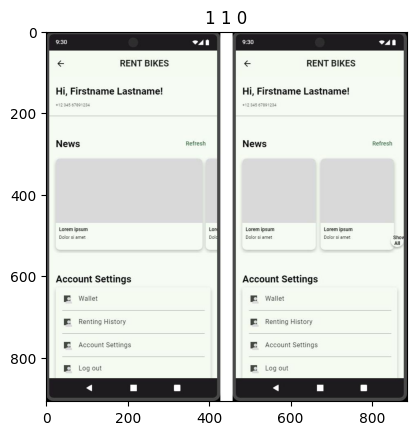

Violations:
1. Carousel items too large: The carousel items are too wide, causing only one item to be fully visible at a time. This does not utilize the available space efficiently. 2. Missing 'Show All' button: A 'Show All' button is recommended next to the carousel.

Changes:
1. Reduce the width of the carousel items to show at least two items at a time.
2. Add a 'Show All' button next to the carousel.



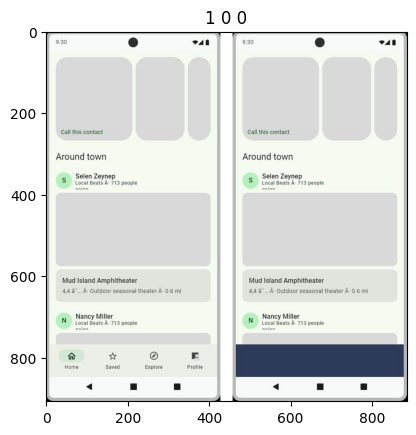

Violations:
The current navigation bar uses a background color (#EBEFE7FF) that may not provide enough contrast with the icons and text, potentially violating accessibility guidelines for sufficient color contrast.

Changes:
Change the background color of the navigation bar to a darker color to improve contrast and ensure readability.


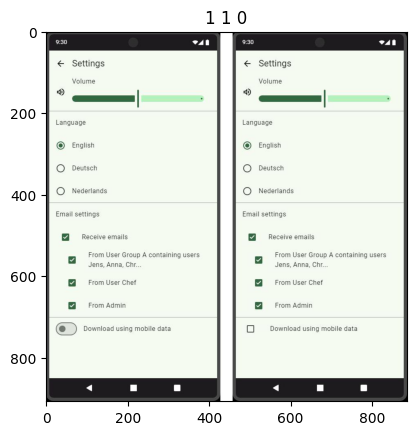

Violations:
The switch is being used for an option ('Download using mobile data') that might require saving or confirmation before coming into effect. According to the Material Design 3 guidelines, checkboxes should be used instead of switches if option choices need to be saved/confirmed before coming into effect.

Changes:
Replace the switch with a checkbox for the 'Download using mobile data' option.


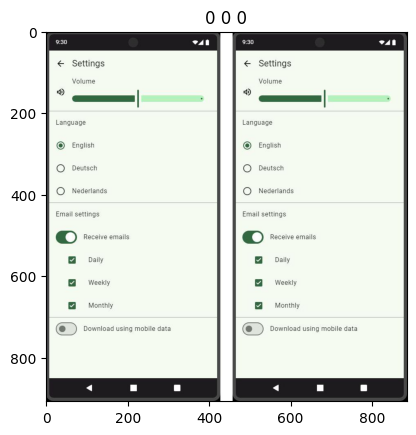

Violations:
1. The divider between "Language" and the radio buttons is missing. 2. The divider between "Email settings" and the switch is missing. 3. The divider between the "Receive emails" switch and the checkboxes is missing.

Changes:
1. Add a divider between "Language" and the radio buttons. 2. Add a divider between "Email settings" and the switch. 3. Add a divider between the "Receive emails" switch and the checkboxes.


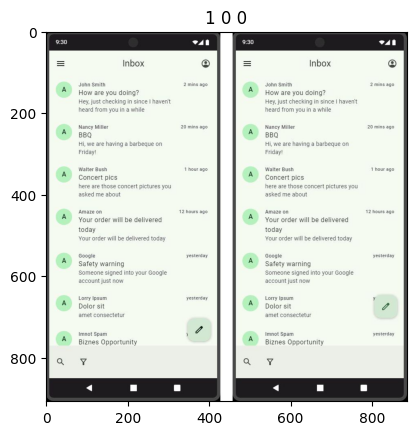

Violations:
1. Placement issue: The FAB is placed in the bottom right corner, but it overlaps with the bottom app bar. According to Material Design guidelines, FABs should be placed above the bottom app bar and not overlap with it. Severity: high. 2. Color contrast: The icon inside the FAB has insufficient contrast against the FAB background. The icon color should be more distinct to ensure accessibility. Severity: medium.

Changes:
1. Relocate the FAB to be above the bottom app bar without overlapping it. 2. Adjust the color of the icon inside the FAB to ensure better contrast.


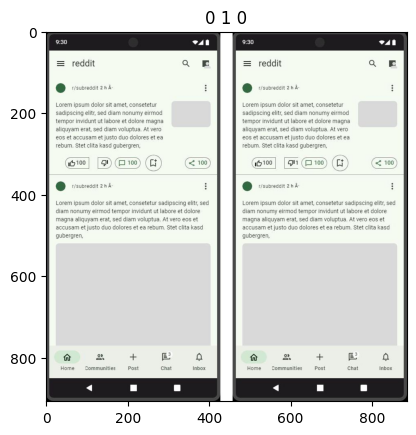

Violations:
The segmented button 'Segment-start' includes both an icon and a label, while 'Segment-end' includes only an icon. According to Material Design 3 guidelines, each segment of a segmented button should be styled the same way and should not mix icon and text segments.

Changes:
Change the 'Segment-end' to include both an icon and a label, similar to the 'Segment-start'.


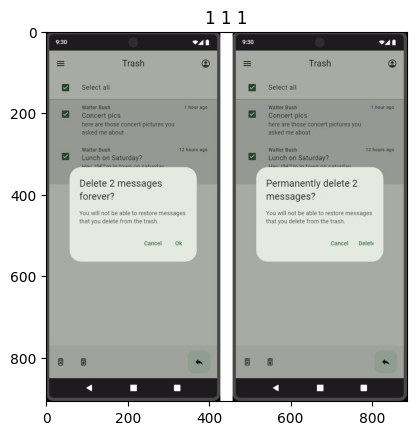

Violations:
1. The headline of the dialog is a question, which should be an unambiguous statement per Material Design 3 guidelines. 2. The primary action button text 'Ok' is vague.

Changes:
1. Change the headline to 'Permanently delete 2 messages?'. 2. Update the primary action button text to 'Delete'.


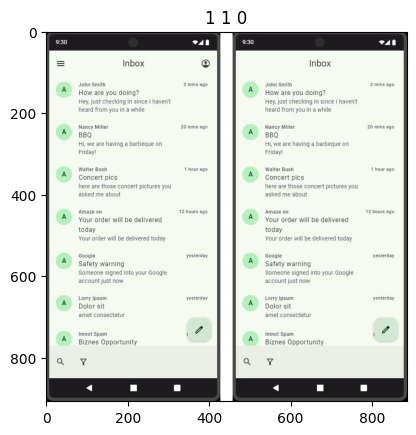

Violations:
The top app bar in the mockup uses a small-centered configuration, which should be used for the main root page of an app. However, the left-aligned leading icon and the right-aligned trailing icon are not appropriate for a centered configuration. The headline text should be centered with no leading or trailing icons.

Changes:
Remove the leading and trailing icons to ensure the headline remains centered in the top app bar.


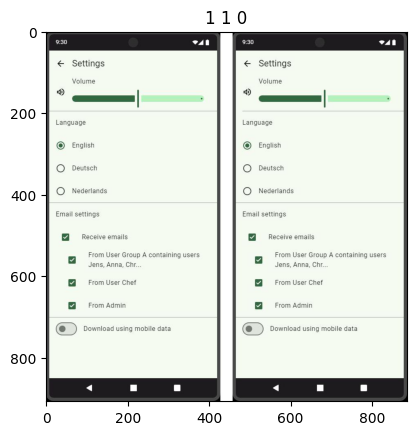

Violations:
The divider below the volume section is a full-width divider, but the section below it (language selection) is related content. According to Material Design 3 Guidelines, an inset divider should be used to separate related content within a section.

Changes:
Replace the full-width divider with an inset divider to better group the related content.


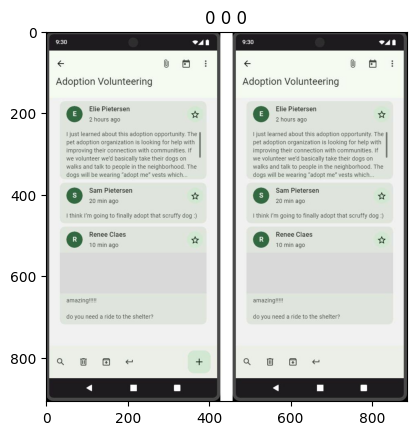

Violations:
1. Positioning issue: The FAB is located near the top right of the screen. According to Material Design guidelines, FABs should be placed in the bottom right corner to be easily accessible using thumbs. This violation is quite severe because it affects the usability and accessibility of the FAB. 2. Overlapping issue: The FAB is placed in a position where it might overlap with other content, making it difficult for users to distinguish interactable areas. This violation is moderately severe because it can lead to confusion about the interactable areas and impede the visibility of other content.

Changes:
1. Reposition the FAB to the bottom right corner of the screen to improve accessibility and adherence to the guidelines. Ensure it does not overlap with any navigation or bottom app bars.


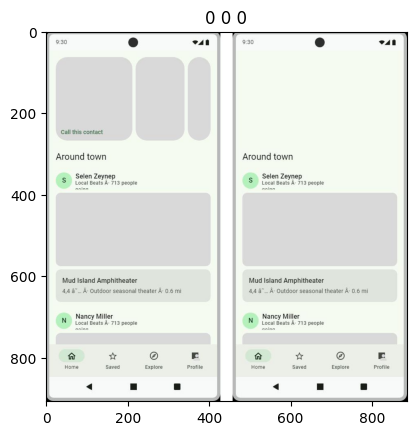

Violations:
1. Button inside carousel item: Buttons should not be placed inside carousel items. 2. Carousel items too small: The last item in the carousel is too small to be easily recognizable.

Changes:
1. Remove the button from the carousel item. 2. Increase the width of the carousel items to make them more recognizable.


In [10]:
for index, row in one_step_sample.iterrows():
    img = Image.open(row["image_loc"])
    plt.imshow(img)
    plt.title(str(row["anno_0"]) + " " + str(row["anno_1"]) + " " + str(row["anno_2"]))
    plt.show()
    print(row["title"])

In [11]:
print(ones_os/len(one_step_sample))
print(ones_0_os/len(one_step_sample))
print(ones_1_os/len(one_step_sample))
print(ones_2_os/len(one_step_sample))
fleiss_kappa(fleiss_matrix)

0.4666666666666667
0.6666666666666666
0.6
0.13333333333333333
N 15 k 2 n 3.0


np.float64(0.10714285714285694)

In [12]:
print(cohen_kappa_score(one_step_sample["anno_0"].tolist(), one_step_sample["anno_1"].tolist()))
print(cohen_kappa_score(one_step_sample["anno_0"].tolist(), one_step_sample["anno_2"].tolist()))
print(cohen_kappa_score(one_step_sample["anno_1"].tolist(), one_step_sample["anno_2"].tolist()))

0.2857142857142857
0.1428571428571428
0.18604651162790697


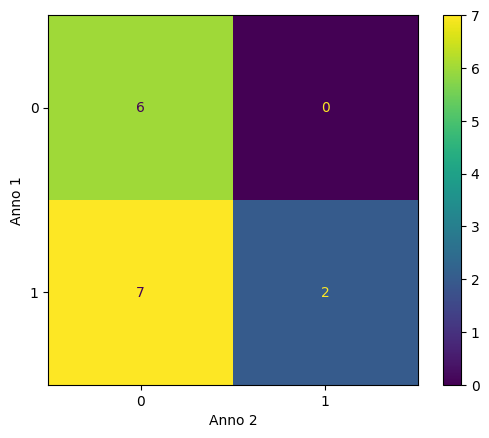

In [13]:
conf_matrix = confusion_matrix(one_step_sample["anno_1"].tolist(), one_step_sample["anno_2"].tolist())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.xlabel("Anno 2")
plt.ylabel("Anno 1")
plt.show()

In [14]:
fleiss_matrix = np.zeros((15, 2))
ones_ts = 0

ones_0_ts = 0
ones_1_ts = 0
ones_2_ts = 0

for index, row in two_step_sample.iterrows():
    annos = []
    for i in range(3):
        fleiss_matrix[index-20][row["anno_"+str(i)]] += 1
    ones_ts += row["anno_majority"]

    ones_0_ts += row["anno_0"]
    ones_1_ts += row["anno_1"]
    ones_2_ts += row["anno_2"]

two_step_sample.head(15)

,title,method,image_loc,anno_0,anno_1,anno_2,anno_majority
15,Violations:\r\n1. The use of a full-width divi...,two_step,../User Study Sample/two_step/1_switch/1_switc...,1,0,1,1
16,Violations:\r\n1. Inconsistent Icon Button Wei...,two_step,../User Study Sample/two_step/0_common_button/...,1,0,0,0
17,Violations:\r\n1. The bottom app bar contains ...,two_step,../User Study Sample/two_step/0_snackbar/0_sna...,1,0,0,0
18,Violations:\r\n{'description': 'The FAB is pla...,two_step,../User Study Sample/two_step/1_bottom_app_bar...,0,1,0,0
19,Violations:\r\n1. The segmented button segment...,two_step,../User Study Sample/two_step/0_segmented_butt...,1,0,0,0
20,Violations:\r\n1. Inconsistent Icon Button Wei...,two_step,../User Study Sample/two_step/1_bottom_sheet/1...,1,0,0,0
21,Violations:\r\n1. The use of full-width divide...,two_step,../User Study Sample/two_step/0_badge/0_badge_...,0,1,0,0
22,Violations:\r\n1. The checkboxes in the 'Selec...,two_step,../User Study Sample/two_step/0_dialog/0_dialo...,1,1,1,1
23,"Violations:\r\n{'severity': 'high', 'descripti...",two_step,../User Study Sample/two_step/0_carousel/0_car...,1,0,0,0
24,"Violations:\r\n1. The divider in the 'Hi, Firs...",two_step,../User Study Sample/two_step/0_divider/0_divi...,0,1,0,0


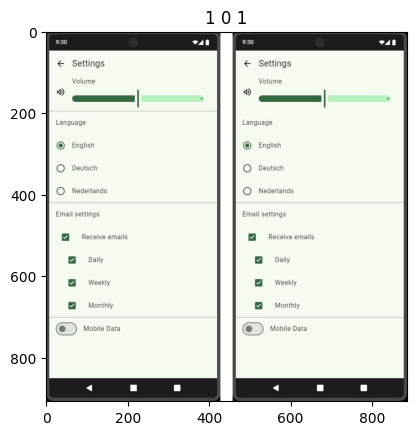

../User Study Sample/two_step/1_switch/1_switch_divider_combined.jpg
Violations:
1. The use of a full-width divider below the 'Volume' section is appropriate. However, the divider's color (#C1C9BEFF) might be too light, potentially making it less visible and thereby reducing its effectiveness in separating sections. Material Design Guidelines suggest that dividers should be visible but not overly bold.
2. The divider's position might be too close to the 'Volume' section, which could make the visual separation less effective. Material Design Guidelines suggest using dividers with enough spacing to clearly separate sections.


Changes:
1. Adjust the color of the divider to a slightly darker shade to ensure it is visible but not overly bold. A color like #B0B0B0FF could be more appropriate.
2. Ensure there is adequate spacing between the 'Volume' section and the divider to enhance the visual separation. Adding a few more pixels of space above the divider can make the separation clearer.



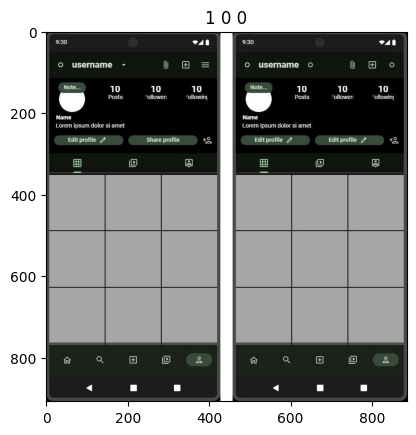

../User Study Sample/two_step/0_common_button/0_common_button_icon_button_combined.jpg
Violations:
1. Inconsistent Icon Button Weights: The icon buttons in the top app bar and the frame below it have inconsistent icon weights. Some icons appear bolder while others are lighter. According to Material Design 3 guidelines, icons in the same component should have the same weight. (Severity: High)
2. Ambiguous Button Styles: The buttons 'Edit profile' and 'Share profile' have different styles even though they are next to each other and serve similar purposes. This inconsistency can confuse users. (Severity: Medium)


Changes:
1. Standardize the icon weights across all icon buttons within the same component to ensure uniformity.
2. Use the same button style for 'Edit profile' and 'Share profile' to maintain visual consistency and avoid confusion.



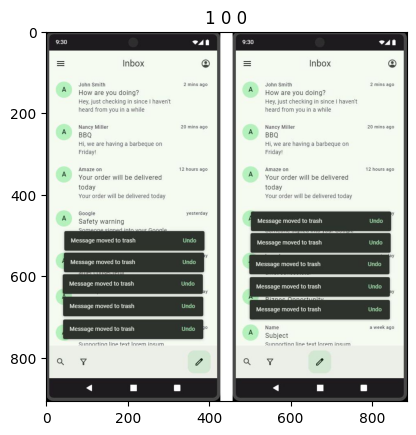

../User Study Sample/two_step/0_snackbar/0_snackbar_bottom_app_bar_combined.jpg
Violations:
1. The bottom app bar contains a FAB placed outside the bottom app bar. According to Material Design 3 guidelines, an FAB should never be placed outside of the bottom app bar.
2. The snackbar messages cover the bottom app bar, which should not happen. Snackbars should appear above the bottom app bar and not cover it.


Changes:
1. Move the FAB into the bottom app bar and place it in a consistent position, such as the center or right side of the bottom app bar.
2. Adjust the position of the snackbar messages so that they appear above the bottom app bar, ensuring they do not cover it.



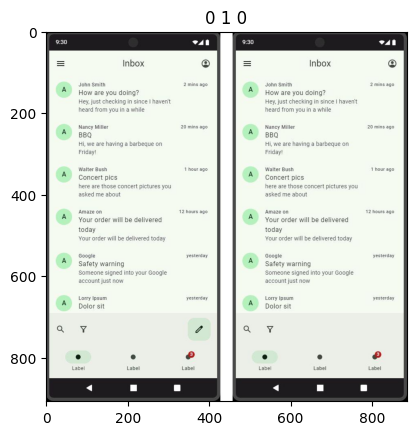

../User Study Sample/two_step/1_bottom_app_bar/1_bottom_app_bar_fab_combined.jpg
Violations:
{'description': 'The FAB is placed near the top right corner of the screen. According to Material Design guidelines, FABs should be placed in the bottom right corner to be easily accessible using thumbs.', 'severity': 'high'}
{'description': 'The FAB is overlapping with the bottom navigation bar. FABs should be placed above any navigation bar or similar element and not overlap with it.', 'severity': 'moderate'}


Changes:
{'description': 'Relocate the FAB to the bottom right corner of the screen, ensuring it does not overlap with any navigation or bottom app bars.'}
{'description': 'Ensure the FAB is placed above the bottom navigation bar without overlapping it. Adjust the position values (Top and Left) accordingly to maintain a clear separation between the FAB and the bottom bar content.'}



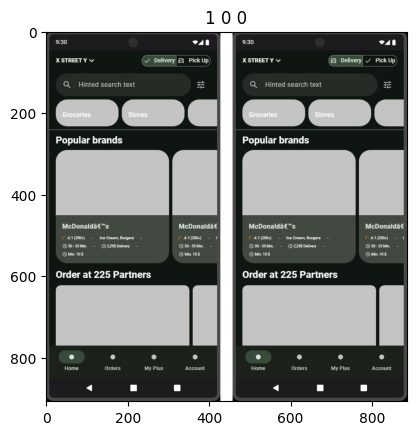

../User Study Sample/two_step/0_segmented_button/0_segmented_button_segmented_button_combined.jpg
Violations:
1. The segmented button segments use both icons and label text, but the selected segment icon has a different weight compared to the text. 2. The segments are not styled consistently: the 'Delivery' segment uses a selected icon, while the 'Pick Up' segment does not.

Changes:
1. Ensure that the icons and label text have the same weight, so they appear visually balanced. 2. Consistently style the segments by either including icons in both segments or removing them from both segments.


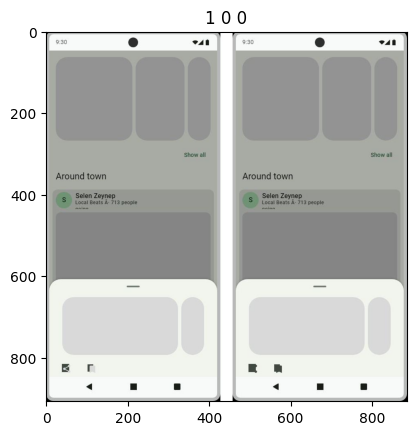

../User Study Sample/two_step/1_bottom_sheet/1_bottom_sheet_icon_button_combined.jpg
Violations:
1. Inconsistent Icon Button Weight and Color: The icons inside the icon buttons have different weights and colors. The 'Share' icon has a different weight and color compared to the 'Bookmark' icon. According to Material Design 3 guidelines, icons in the same component should have the same weight and color to maintain visual consistency and clarity. (Severity: High)
2. Misalignment of Text Labels: The text labels 'Share' and 'Bookmark' are not consistently aligned. 'Share' is left-aligned, while 'Bookmark' is slightly off-center. Text labels should be consistently aligned to ensure a clean and cohesive look. (Severity: Medium)


Changes:
1. Standardize the weight and color of the icons inside the icon buttons to ensure they match. This will improve visual consistency and make it clear that these buttons are part of the same component group.
2. Adjust the alignment of the text labels 'Share' 

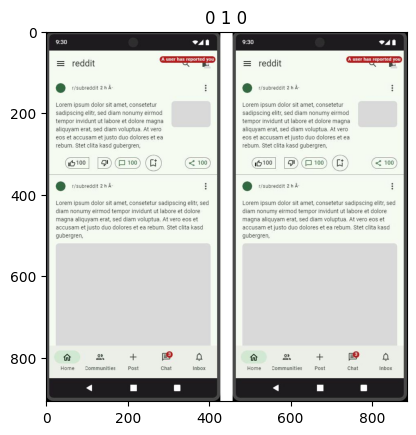

../User Study Sample/two_step/0_badge/0_badge_divider_combined.jpg
Violations:
1. The use of full-width dividers (#C1C9BEFF, light grey) between the stacked cards is appropriate, but the height of the dividers (1.0000280141830444px) might be too thin, making them less visible and potentially confusing for users. Material Design Guidelines suggest that dividers should be visible but not bold.


Changes:
1. Increase the height of the dividers slightly to make them more visible. A height of around 2px would maintain visibility without being too bold.



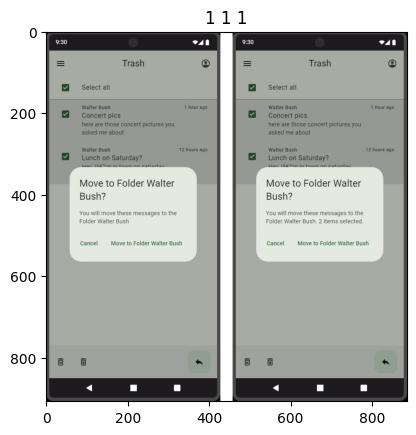

../User Study Sample/two_step/0_dialog/0_dialog_checkbox_combined.jpg
Violations:
1. The checkboxes in the 'Select all' section and the individual items are correctly used. However, the dialog box that appears when moving items to a folder is not clearly connected to the checkboxes, which may cause confusion for the user. This could be improved by making it more obvious that the action is related to the selected items.


Changes:
1. Add a clear visual connection or indication that the dialog box is related to the selected checkboxes. This could be done by highlighting the selected items or adding a brief message in the dialog box that mentions the number of selected items.



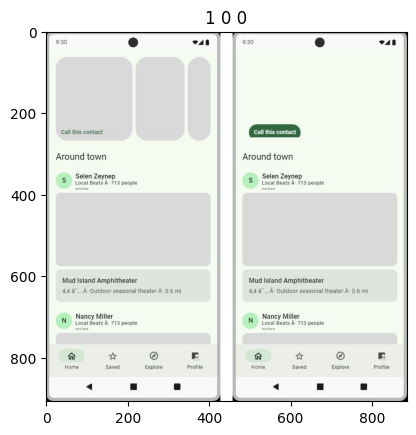

../User Study Sample/two_step/0_carousel/0_carousel_card_combined.jpg
Violations:
{'severity': 'high', 'description': 'The cards contain repetitive content. According to Material Design 3 Guidelines, information should be succinct, unambiguous, and not repetitive. Having multiple cards with the same content can confuse users and clutter the interface.'}
{'severity': 'medium', 'description': "The cards are missing clear visual hierarchy. The 'Call this contact' action in the first card is not visually distinct as an actionable element. According to Material Design 3 Guidelines, it should never be ambiguous which parts of the UI can be interacted with."}


Changes:
{'change': 'Combine repetitive cards into a single card or list item to reduce redundancy and make the information more succinct.'}
{'change': "Make the 'Call this contact' action more visually distinct by using a button or a chip component to clearly indicate it as an actionable element."}



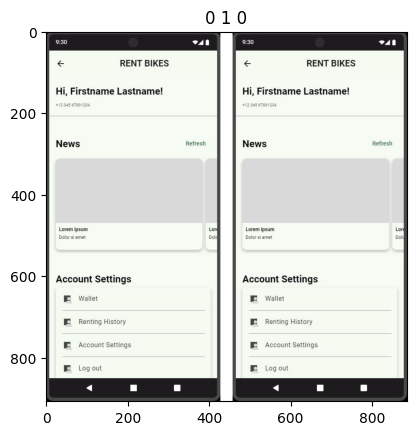

../User Study Sample/two_step/0_divider/0_divider_divider_combined.jpg
Violations:
1. The divider in the 'Hi, Firstname Lastname!' section is too bold and dark (#000000FF, Black), which makes it visually disruptive and detracts from the readability of the section it divides. Material Design Guidelines suggest that dividers should be visible but not bold.
2. The dividers in the 'Account Settings' list are inset dividers, but they extend too close to the edges of the container, making them appear almost like full-width dividers. This can make the layout look cluttered.


Changes:
1. Change the color of the divider in the 'Hi, Firstname Lastname!' section to a more neutral and less bold color, such as #C1C9BEFF (light grey), to make it less disruptive while still maintaining visibility.
2. Adjust the inset dividers in the 'Account Settings' list to ensure they have sufficient space from the edges of the container. This will help in maintaining a clean and uncluttered layout.



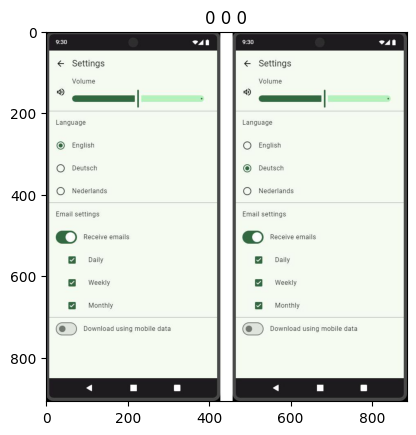

../User Study Sample/two_step/0_switch/0_switch_radio_button_combined.jpg
Violations:
1. The radio buttons are nested within a div with the same top and left positions, which makes them appear as if they are overlapping. This can cause confusion as to which radio button is selected. 2. There is no preselected option for the radio buttons, which is against the guideline that there should always be a preselected option when using radio buttons.

Changes:
1. Ensure that the radio buttons are not overlapping by adjusting their top and left positions. 2. Set one of the radio buttons as the preselected option.


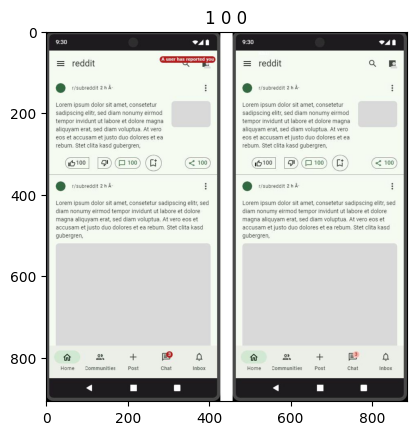

../User Study Sample/two_step/0_badge/0_badge_badge_combined.jpg
Violations:
{'severity': 'high', 'description': "The badge displaying the message 'A user has reported you' is too long for a badge. Badges should have text no longer than 4 characters to maintain readability and avoid clutter."}
{'severity': 'medium', 'description': "The badge displaying the number '3' on the icon in the second code snippet has a background color (#BA1A1AFF) that may not provide enough contrast with the icon it is associated with. This could make the badge less noticeable."}


Changes:
{'description': 'Shorten the text on the badge to a maximum of 4 characters. Consider using an icon or a shorter label to convey the message.'}
{'description': 'Change the badge background color to a more contrasting color that stands out against the icon and its surroundings. For example, using a brighter or more vibrant color can make the badge more noticeable.'}



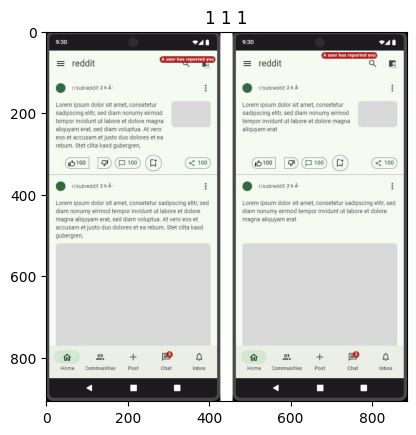

../User Study Sample/two_step/0_badge/0_badge_card_combined.jpg
Violations:
{'severity': 'high', 'description': "The 'A user has reported you' badge is not placed in a way that makes it clear what it is associated with. According to Material Design 3 Guidelines, messages and popups should appear where users are likely to see them and in a way that makes their context clear."}
{'severity': 'medium', 'description': "The cards contain repetitive information ('Lorem ipsum dolor sit amet...') which makes them harder to scan. According to Material Design 3 Guidelines, information should be succinct, unambiguous, and not repetitive."}


Changes:
{'change': "Move the 'A user has reported you' badge closer to the relevant content it is associated with, such as next to the user's profile picture or name."}
{'change': "Reduce the amount of repetitive placeholder text ('Lorem ipsum dolor sit amet...') in the cards to make the content more succinct and easier to scan."}



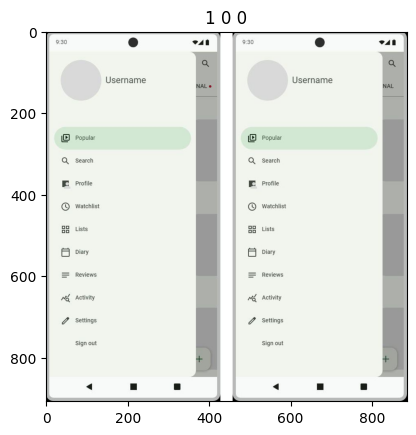

../User Study Sample/two_step/0_navigation_drawer/0_navigation_drawer_badge_combined.jpg
Violations:
{'severity': 'low', 'description': "The small badge is placed very close to the text label 'JOURNAL'. This close proximity might make the badge appear cluttered or difficult to distinguish from the text label. According to the Material Design 3 Guidelines, elements that do not belong together should not appear to be grouped."}


Changes:
{'description': "Increase the spacing between the badge and the text label 'JOURNAL' to ensure that they do not appear to be grouped together. This can make the badge more distinguishable and reduce visual clutter."}



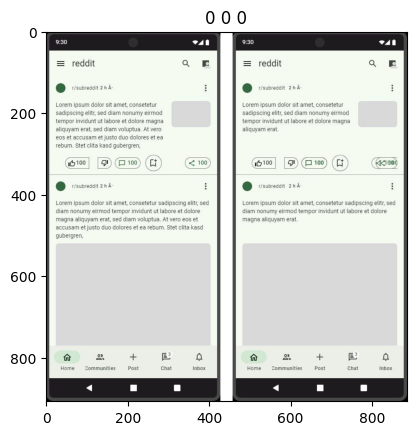

../User Study Sample/two_step/1_badge/1_badge_card_combined.jpg
Violations:
{'severity': 'high', 'description': 'The cards contain a large amount of text, which can be overwhelming and difficult to scan quickly. According to Material Design 3 Guidelines, information should be easy to scan for relevant and actionable information and should have a clear hierarchy.'}
{'severity': 'medium', 'description': "The 'Actions' section of the cards includes multiple buttons that are very close to each other. According to Material Design 3 Guidelines, click goals should be large enough to hit and not too close to each other."}
{'severity': 'low', 'description': "The 'Subhead' text in the 'Header' section of the cards is slightly crowded. According to Material Design 3 Guidelines, text should always be easy to read and not too small or crowded."}


Changes:
{'change': "Reduce the amount of text in the 'Title' section to make it more succinct and easier to read. Consider breaking up the text into sma

In [15]:
for index, row in two_step_sample.iterrows():
    img = Image.open(row["image_loc"])
    plt.imshow(img)
    plt.title(str(row["anno_0"]) + " " + str(row["anno_1"]) + " " + str(row["anno_2"]))
    plt.show()
    print(row["image_loc"])
    print(row["title"])

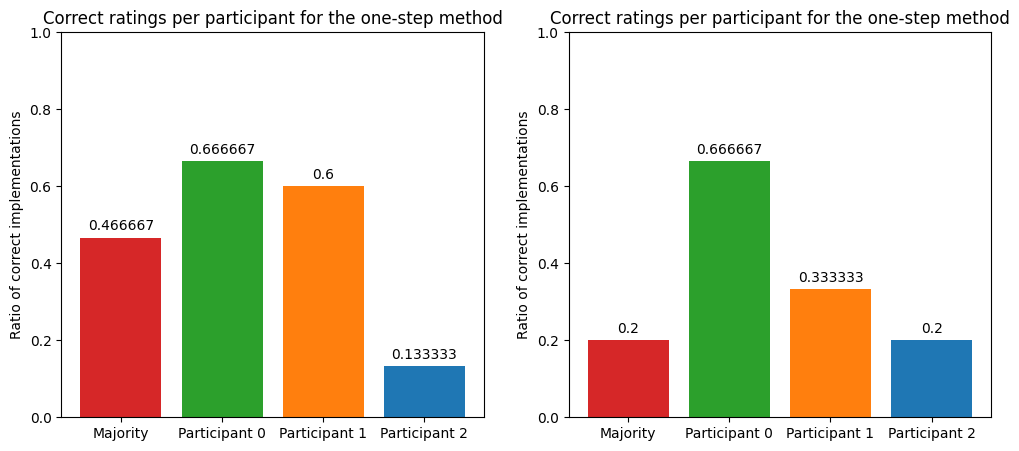

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
names = ["Majority", "Participant 0", "Participant 1", "Participant 2"]
colors = ["tab:red", "tab:green", "tab:orange", "tab:blue"]

values1 = [ones_os/len(two_step_sample), ones_0_os/len(one_step_sample), ones_1_os/len(one_step_sample), ones_2_os/len(one_step_sample)]

rects = ax1.bar(names, values1, label=names, color=colors)
ax1.bar_label(rects, padding=3)

ax1.set_ylabel("Ratio of correct implementations")
ax1.set_title("Correct ratings per participant for the one-step method")
ax1.set_ylim(0.0, 1.0)

values2 = [ones_ts/len(two_step_sample), ones_0_ts/len(two_step_sample), ones_1_ts/len(two_step_sample), ones_2_ts/len(two_step_sample)]

rects = ax2.bar(names, values2, label=names, color=colors)
ax2.bar_label(rects, padding=3)

ax2.set_ylabel("Ratio of correct implementations")
ax2.set_title("Correct ratings per participant for the one-step method")
ax2.set_ylim(0.0, 1.0)

plt.savefig("../change_implementation_survey_results.png", bbox_inches="tight")

plt.show()

In [17]:
print(ones_ts/len(two_step_sample))
print(ones_0_ts/len(two_step_sample))
print(ones_1_ts/len(two_step_sample))
print(ones_2_ts/len(two_step_sample))
fleiss_kappa(fleiss_matrix)

0.2
0.6666666666666666
0.3333333333333333
0.2
N 15 k 2 n 3.0


np.float64(-0.01851851851851887)

In [18]:
print(cohen_kappa_score(two_step_sample["anno_0"].tolist(), two_step_sample["anno_1"].tolist()))
print(cohen_kappa_score(two_step_sample["anno_0"].tolist(), two_step_sample["anno_2"].tolist()))
print(cohen_kappa_score(two_step_sample["anno_1"].tolist(), two_step_sample["anno_2"].tolist()))

-0.31999999999999984
0.2222222222222222
0.33333333333333337


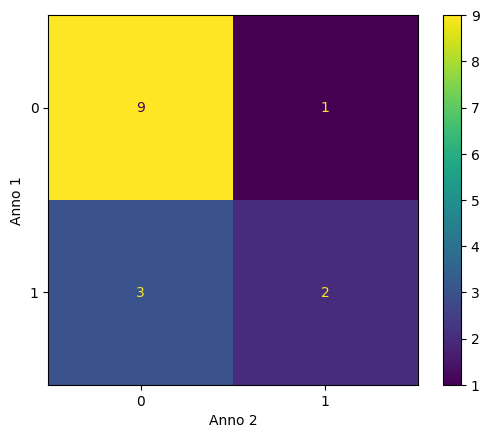

In [19]:
conf_matrix = confusion_matrix(two_step_sample["anno_1"].tolist(), two_step_sample["anno_2"].tolist())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.xlabel("Anno 2")
plt.ylabel("Anno 1")
plt.show()